<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Estatistica_medidasPosicao_Dispersao_quartis_algoritimos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medidas de Dispesão e Posição**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
from scipy import stats

##Dados não agrupados

In [2]:
dados = np.array([160, 165, 164, 167, 164, 160, 166, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

- Média Aritimética Simples

In [6]:
dados.sum() / len(dados)

160.475

ou podemos

In [7]:
dados.mean()

160.475

ou ainda...

In [8]:
statistics.mean(dados)

160

- Moda

In [11]:
stats.mode(dados)

ModeResult(mode=array([155]), count=array([4]))

o valor que mais aparece é 155, e mostra que aparece 4 vezes

- Mediana

In [12]:
dados_impar = [150, 151, 152, 152, 153, 154, 155,155,155] #mediana impar

calculo manual mediana impar

In [13]:
posicao = len(dados_impar) / 2
posicao

4.5

In [15]:
posicao = math.ceil(posicao)
posicao #arredontar pra cima

5

In [18]:
dados_impar[posicao -1] # -1 pois aqui no python comecamo contar do zeero

153

realmente dos dados_impar o "153" é a posição "5"

calculo manual mediana par

In [22]:
posicao = len(dados) // 2

In [23]:
posicao

20

In [24]:
dados[posicao -1], dados[posicao]

(156, 155)

In [25]:
mediana = (dados[posicao -1] + dados[posicao]) / 2
mediana

155.5

ou seja, no centro da base de dados é a altura é 155,5 cm

In [27]:
#ou mais simples, podemos achar a mediana assim:

In [28]:
np.median(dados_impar)

153.0

In [29]:
np.median(dados)

160.5

ou...

In [30]:
statistics.median(dados_impar)

153

In [31]:
statistics.median(dados)

160.5

# Dados Agrupados

- Média Aritimética Ponderada, Moda e Mediana com distr de freq

In [35]:
data = {'inferior':[150,154,158,162,168,170],
        'superior':[154,158,162,166,170,174],
        'frequencia':[5,9,11,7,5,3]}

In [36]:
data

{'frequencia': [5, 9, 11, 7, 5, 3],
 'inferior': [150, 154, 158, 162, 168, 170],
 'superior': [154, 158, 162, 166, 170, 174]}

In [37]:
data_set = pd.DataFrame(data)

In [38]:
data_set

,inferior,superior,frequencia
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,168,170,5
5,170,174,3


In [39]:
data_set['xi'] = (data_set['superior'] + data_set['inferior']) / 2

In [40]:
data_set

,inferior,superior,frequencia,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,168,170,5,169.0
5,170,174,3,172.0


In [43]:
data_set['freq.xi'] = data_set['frequencia'] * data_set['xi']

In [46]:
data_set #descondiere a coluna fi.xi, é a mesma que freq.xi

,inferior,superior,frequencia,xi,fi.xi,freq.xi
0,150,154,5,152.0,760.0,760.0
1,154,158,9,156.0,1404.0,1404.0
2,158,162,11,160.0,1760.0,1760.0
3,162,166,7,164.0,1148.0,1148.0
4,168,170,5,169.0,845.0,845.0
5,170,174,3,172.0,516.0,516.0


In [47]:
data_set['Fi'] = 0
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
0,150,154,5,152.0,760.0,760.0,0
1,154,158,9,156.0,1404.0,1404.0,0
2,158,162,11,160.0,1760.0,1760.0,0
3,162,166,7,164.0,1148.0,1148.0,0
4,168,170,5,169.0,845.0,845.0,0
5,170,174,3,172.0,516.0,516.0,0


In [52]:
frequencia_acumulada = []
somatorio = 0
for linha in data_set.iterrows():
  #print(linha)
  #print(linha[1][2])
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

In [53]:
frequencia_acumulada

[5.0, 14.0, 25.0, 32.0, 37.0, 40.0]

In [54]:
data_set['Fi'] = frequencia_acumulada

In [55]:
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
0,150,154,5,152.0,760.0,760.0,5.0
1,154,158,9,156.0,1404.0,1404.0,14.0
2,158,162,11,160.0,1760.0,1760.0,25.0
3,162,166,7,164.0,1148.0,1148.0,32.0
4,168,170,5,169.0,845.0,845.0,37.0
5,170,174,3,172.0,516.0,516.0,40.0


base de dados esta pronta agora e podemos calcular alguns itens

- média

In [59]:
data_set['frequencia'].sum() , data_set['freq.xi'].sum()

(40, 6433.0)

In [60]:
data_set['freq.xi'].sum() / data_set['frequencia'].sum() #média ponderada

160.825

- Moda

In [61]:
data_set['frequencia'].max()

11

In [63]:
data_set[data_set['frequencia'] == data_set['frequencia'].max()]

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
2,158,162,11,160.0,1760.0,1760.0,25.0


e nos traz o valor da classe todo que a freq é 11

In [67]:
data_set[data_set['frequencia'] == data_set['frequencia'].max()]['xi'].values[0] #voltando ser um array, por isso .values[0]

160.0

temos o valor da moda ponderada

- Mediana

In [68]:
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
0,150,154,5,152.0,760.0,760.0,5.0
1,154,158,9,156.0,1404.0,1404.0,14.0
2,158,162,11,160.0,1760.0,1760.0,25.0
3,162,166,7,164.0,1148.0,1148.0,32.0
4,168,170,5,169.0,845.0,845.0,37.0
5,170,174,3,172.0,516.0,516.0,40.0


In [69]:
fi_2 = data_set['frequencia'].sum() / 2

In [70]:
fi_2

20.0

In [114]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0,0,0
for linha in data_set.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
  break


In [115]:
limite_inferior, frequencia_classe, id_frequencia_anterior

(150.0, 5.0, -1)

In [110]:
Fi_anterior = data_set.iloc[[id_frequencia_anterior]]['Fi'].values[0]

In [111]:
Fi_anterior

14.0

In [112]:
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

In [ ]:
mediana #134.0

mediana ponderada

In [97]:
#de forma completa, temos

In [102]:
def get_estatisticas(dataframe):
  media = data_set['freq.xi'].sum() / data_set['frequencia'].sum()
  moda = data_set[data_set['frequencia'] == data_set['frequencia'].max()]['xi'].values[0]

  fi_2 = data_set['frequencia'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(data_set.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = data_set.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  return media, moda, mediana

In [103]:
get_estatisticas(data_set)

(160.825, 160.0, 134.0)

media, moda, mediana

**Média geometrica , harmonica e quadratica**

- Quartis (não agrupados)

In [116]:
dados_impar = [150,151,152,152,153,154,155,155,155]

In [120]:
#numpy
np.quantile(dados_impar, 0.5) #2 quartil(0.5) #mesmo valor da mediana

153.0

In [122]:
np.quantile(dados_impar, 0.75) #3 quartil(0.75)

155.0

In [123]:
np.quantile(dados_impar, 0.25) # 1 quartil(0.25)

152.0

quartis no total dos dados agora

In [124]:
np.quantile(dados,0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(155.75, 160.5, 164.0)

In [127]:
#scipy
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados,75)

(155.75, 160.5, 164.0)

- Quartis (agrupados)

In [128]:
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
0,150,154,5,152.0,760.0,760.0,5.0
1,154,158,9,156.0,1404.0,1404.0,14.0
2,158,162,11,160.0,1760.0,1760.0,25.0
3,162,166,7,164.0,1148.0,1148.0,32.0
4,168,170,5,169.0,845.0,845.0,37.0
5,170,174,3,172.0,516.0,516.0,40.0


In [129]:
def get_quartil(dataframe, q1 = True):
  if q1 == True:
    fi_4 = data_set['frequencia'].sum() / 4
  else:
    fi_4 = (3 * data_set['frequencia'].sum()) / 4
  
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for linha in data_set.iterrows():
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_4:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = data_set.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  q = limite_inferior + ((fi_4 - Fi_anterior) * 4) / frequencia_classe

  return q

In [130]:
get_quartil(dados), get_quartil(dados, q1 = False)

(126.0, 142.0)

- percentis

In [131]:
np.median(dados), np.quantile(dados, 0.5), np.percentile(dados, 50)

(160.5, 160.5, 160.5)

In [132]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(151.95000000000002, 152.89999999999998, 168.1)

**Medidas de Dispersão**

- Amplitude total e diferença interquartil

In [135]:
dados

array([160, 165, 164, 167, 164, 160, 166, 161, 150, 152, 173, 160, 155,
       164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164, 155,
       152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172,
       153])

In [136]:
dados.max() - dados.min()

23

In [137]:
q1 = np.quantile(dados, 0.25)
q3 = np.quantile(dados, 0.75)
q1, q3

(155.75, 164.0)

In [138]:
diferenca_interquartil = q3 - q1
diferenca_interquartil

8.25

In [139]:
inferior = q1 - (1.5 * diferenca_interquartil)
inferior

143.375

In [140]:
superior = q3 + (1.5 * diferenca_interquartil)
superior

176.375

- Variância, desvio padrão e coeficiente de variação

In [142]:
np.var(dados_impar)

3.111111111111111

In [143]:
np.std(dados_impar)

1.7638342073763937

In [144]:
np.var(dados)

34.299375000000005

In [145]:
np.std(dados)

5.856566827075399

In [146]:
statistics.variance(dados)

35

In [147]:
statistics.stdev(dados)

5.916079783099616

ou...


In [148]:
from scipy import ndimage
ndimage.variance(dados)

34.299375000000005

In [149]:
stats.tstd(dados, ddof = 0)

5.856566827075399

In [151]:
stats.variation(dados_impar) * 100, stats.variation(dados) * 100

(1.1528328152786886, 3.6495197551490257)

- Desvio padrão com dados agrupados

In [152]:
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi
0,150,154,5,152.0,760.0,760.0,5.0
1,154,158,9,156.0,1404.0,1404.0,14.0
2,158,162,11,160.0,1760.0,1760.0,25.0
3,162,166,7,164.0,1148.0,1148.0,32.0
4,168,170,5,169.0,845.0,845.0,37.0
5,170,174,3,172.0,516.0,516.0,40.0


In [153]:
data_set['xi_2'] = data_set['xi'] * data_set['xi']
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi,xi_2
0,150,154,5,152.0,760.0,760.0,5.0,23104.0
1,154,158,9,156.0,1404.0,1404.0,14.0,24336.0
2,158,162,11,160.0,1760.0,1760.0,25.0,25600.0
3,162,166,7,164.0,1148.0,1148.0,32.0,26896.0
4,168,170,5,169.0,845.0,845.0,37.0,28561.0
5,170,174,3,172.0,516.0,516.0,40.0,29584.0


In [155]:
data_set['fi_xi_2'] = data_set['frequencia'] * data_set['xi_2']
data_set

,inferior,superior,frequencia,xi,fi.xi,freq.xi,Fi,xi_2,fi_xi_2
0,150,154,5,152.0,760.0,760.0,5.0,23104.0,115520.0
1,154,158,9,156.0,1404.0,1404.0,14.0,24336.0,219024.0
2,158,162,11,160.0,1760.0,1760.0,25.0,25600.0,281600.0
3,162,166,7,164.0,1148.0,1148.0,32.0,26896.0,188272.0
4,168,170,5,169.0,845.0,845.0,37.0,28561.0,142805.0
5,170,174,3,172.0,516.0,516.0,40.0,29584.0,88752.0


In [156]:
data_set.columns

Index(['inferior', 'superior', 'frequencia', 'xi', 'fi.xi', 'freq.xi', 'Fi',
       'xi_2', 'fi_xi_2'],
      dtype='object')

In [157]:
colunas_ordenadas = ['inferior', 'superior', 'frequencia', 'xi', 'freq.xi', 'xi_2', 'fi_xi_2', 'Fi']

In [159]:
colunas_ordenadas

['inferior',
 'superior',
 'frequencia',
 'xi',
 'freq.xi',
 'xi_2',
 'fi_xi_2',
 'Fi']

In [160]:
data_set = data_set[colunas_ordenadas]
data_set

,inferior,superior,frequencia,xi,freq.xi,xi_2,fi_xi_2,Fi
0,150,154,5,152.0,760.0,23104.0,115520.0,5.0
1,154,158,9,156.0,1404.0,24336.0,219024.0,14.0
2,158,162,11,160.0,1760.0,25600.0,281600.0,25.0
3,162,166,7,164.0,1148.0,26896.0,188272.0,32.0
4,168,170,5,169.0,845.0,28561.0,142805.0,37.0
5,170,174,3,172.0,516.0,29584.0,88752.0,40.0


In [163]:
dp = math.sqrt(data_set['fi_xi_2'].sum() / data_set['frequencia'].sum() - math.pow(data_set['freq.xi'].sum() / data_set['frequencia'].sum(), 2))
dp

5.885947247470325

**Testes com algoritmos de classificação**

In [164]:
base = pd.read_csv('/content/credit_data.csv')

In [165]:
base.shape

(2000, 5)

In [166]:
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [167]:
base.tail()

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [196]:
base

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [190]:
base.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [197]:
base.loc[pd.isnull(base['age'])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [198]:
base['age'].fillna(base['age'].mean(), inplace = True) #aqui poderiamos ter substituido tbm pela moda ou mediana

In [199]:
base.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

perfeito agora

In [200]:
x = base.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [201]:
y = base.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0])

- Treinamento do Modelo

In [208]:
from sklearn.model_selection import train_test_split



In [258]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.20,random_state = 0)

In [259]:
x_treinamento.shape, y_treinamento.shape

((1600, 3), (1600,))

In [260]:
x_teste.shape, y_teste.shape

((400, 3), (400,))

**Algoritimo de Naive Bayes**

In [261]:
from sklearn.naive_bayes import GaussianNB


In [262]:
nb = GaussianNB()

In [263]:
nb.fit(x_treinamento, y_treinamento)

GaussianNB()

In [264]:
previsao = nb.predict(x_teste)

In [265]:
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [266]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [267]:
from sklearn.metrics import accuracy_score, classification_report

In [268]:
accuracy_score(y_teste, previsao)

0.945

excelente acurácia de 94.5%, o modelo preveu bem

In [250]:
from yellowbrick.classifier import ConfusionMatrix

0.945

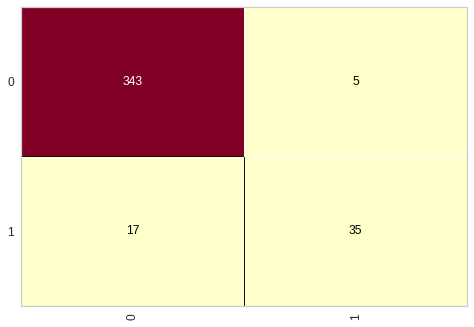

In [269]:
cm = ConfusionMatrix(nb)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [270]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       348
           1       0.88      0.67      0.76        52

    accuracy                           0.94       400
   macro avg       0.91      0.83      0.86       400
weighted avg       0.94      0.94      0.94       400



boa previsão, o modelo classificou melhor o 0 do que o 1, mas ainda sim temos uma otima acurácia

**Algoritimo de Random Forest**

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [273]:
rf.fit(x_treinamento, y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [274]:
previsão = rf.predict(x_teste)

In [276]:
previsão

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [277]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [278]:
accuracy_score(y_teste, previsão)

0.9825

uma acurácia melhor ainda agora

In [279]:
cm2 = ConfusionMatrix(rf)

0.9825

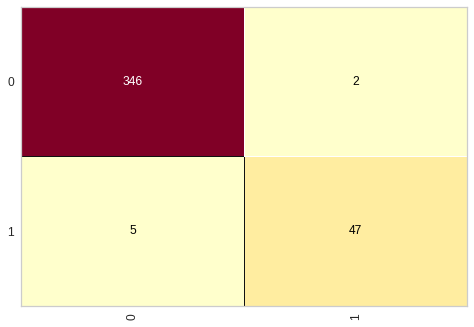

In [280]:
cm2.fit(x_treinamento, y_treinamento)
cm2.score(x_teste, y_teste)

In [281]:
print(classification_report(y_teste, previsão))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.96      0.90      0.93        52

    accuracy                           0.98       400
   macro avg       0.97      0.95      0.96       400
weighted avg       0.98      0.98      0.98       400



praticamente perfeito o resultado, acurácia de 98%, bons indices nas duas classificações

**Algoritimo de Regressão Logistica**

In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
rl = LogisticRegression()

In [286]:
rl.fit(x_treinamento, y_treinamento)
predict = rl.predict(x_teste)

In [287]:
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [288]:
y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [289]:
accuracy_score(y_teste, predict)

0.9375

boa acurácia mas pior que o algoritimo de **Random Forest**

Vamos fazer de outra forma agora, para que depois possamos calcular facilmente alguns itens estatisticos

In [290]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []
for i in range(30):
  x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = i)
  naive_bayes = GaussianNB()
  naive_bayes.fit(x_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(x_teste)))

  logistica = LogisticRegression()
  logistica.fit(x_treinamento, y_treinamento)
  resultados_logistica.append(accuracy_score(y_teste, logistica.predict(x_teste)))

  random_forest = RandomForestClassifier()
  random_forest.fit(x_treinamento, y_treinamento)
  resultados_forest.append(accuracy_score(y_teste, random_forest.predict(x_teste)))

In [291]:
print(resultados_naive_bayes)

[0.915, 0.9375, 0.9425, 0.9275, 0.9225, 0.9125, 0.915, 0.9125, 0.905, 0.9425, 0.9125, 0.9225, 0.9475, 0.9225, 0.9175, 0.9225, 0.9325, 0.9175, 0.925, 0.9125, 0.93, 0.915, 0.9275, 0.945, 0.945, 0.93, 0.945, 0.9275, 0.935, 0.9325]


In [292]:
print(resultados_logistica)

[0.8975, 0.905, 0.9225, 0.9125, 0.9075, 0.8975, 0.9, 0.9125, 0.935, 0.94, 0.915, 0.895, 0.9175, 0.915, 0.91, 0.915, 0.9025, 0.9075, 0.9225, 0.91, 0.9225, 0.925, 0.895, 0.93, 0.9225, 0.93, 0.925, 0.905, 0.8975, 0.9025]


In [293]:
print(resultados_forest)

[0.9775, 0.9825, 0.9825, 0.99, 0.9775, 0.9875, 0.9925, 0.9875, 0.99, 0.9875, 0.985, 0.98, 0.9675, 0.985, 0.98, 0.9875, 0.985, 0.9775, 0.985, 0.9875, 0.9775, 0.98, 0.99, 0.9825, 0.99, 0.995, 0.9925, 0.985, 0.9925, 0.985]


In [295]:
type(resultados_naive_bayes), type(resultados_forest), type(resultados_logistica)

(list, list, list)

In [296]:
resultados_naive_bayes = np.array(resultados_naive_bayes)
resultados_logistica = np.array(resultados_logistica)
resultados_forest = np.array(resultados_forest)

In [297]:
type(resultados_naive_bayes), type(resultados_forest), type(resultados_logistica) #aqui voltamos pra array

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

Para terminar vamos aplicar alguns resultados de estatisticas

- Média

In [298]:
resultados_naive_bayes.mean(), resultados_logistica.mean(), resultados_forest.mean()

(0.9265833333333333, 0.9131666666666668, 0.9848333333333332)

- Moda

In [300]:
stats.mode(resultados_naive_bayes), stats.mode(resultados_logistica), stats.mode(resultados_forest)

(ModeResult(mode=array([0.9125]), count=array([4])),
 ModeResult(mode=array([0.9225]), count=array([4])),
 ModeResult(mode=array([0.985]), count=array([6])))

- Mediana

In [301]:
np.median(resultados_naive_bayes), np.median(resultados_logistica), np.median(resultados_forest)

(0.92625, 0.9125, 0.985)

- variancia

In [302]:
np.set_printoptions(suppress=True)
np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)

(0.00013811805555555542, 0.0001478888888888891, 3.4138888888888884e-05)

In [303]:
np.min([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

2.9229166666666637e-05

In [304]:
np.max([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

0.00020933333333333337

In [305]:
resultados_forest

array([0.9775, 0.9825, 0.9825, 0.99  , 0.9775, 0.9875, 0.9925, 0.9875,
       0.99  , 0.9875, 0.985 , 0.98  , 0.9675, 0.985 , 0.98  , 0.9875,
       0.985 , 0.9775, 0.985 , 0.9875, 0.9775, 0.98  , 0.99  , 0.9825,
       0.99  , 0.995 , 0.9925, 0.985 , 0.9925, 0.985 ])

- desvio padrão

In [306]:
np.std(resultados_naive_bayes), np.std(resultados_logistica), np.std(resultados_forest)

(0.011752363828420027, 0.012160957564636475, 0.005842849380986034)

- coeficiente de variação

In [307]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.268354761588635, 1.3317347214422128, 0.593283064578037)

**Cross- Validation**

In [308]:
from sklearn.model_selection import cross_val_score, KFold

In [310]:
resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, x, y, cv = kfold)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, x, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

In [311]:
scores, 10 * 30

(array([0.985, 0.99 , 0.985, 1.   , 1.   , 0.985, 0.985, 0.97 , 0.985,
        0.99 ]), 300)

In [312]:
scores.mean()

0.9875

In [313]:
print(resultados_naive_bayes_cv)

[0.9250000000000002, 0.9244999999999999, 0.9254999999999999, 0.9259999999999999, 0.9244999999999999, 0.9255000000000001, 0.9245000000000001, 0.9239999999999998, 0.925, 0.925, 0.9265000000000001, 0.9240000000000002, 0.925, 0.9259999999999999, 0.9244999999999999, 0.9225, 0.924, 0.9265000000000001, 0.9259999999999999, 0.9260000000000002, 0.9235, 0.9255000000000001, 0.9245000000000001, 0.9245000000000001, 0.925, 0.9259999999999999, 0.925, 0.9245000000000001, 0.924, 0.9254999999999999]


In [314]:
print(resultados_logistica_cv)

[0.9115, 0.9110000000000001, 0.9215, 0.9105000000000001, 0.913, 0.9129999999999999, 0.9099999999999999, 0.9105000000000001, 0.9170000000000001, 0.916, 0.9105000000000001, 0.9135, 0.9175000000000001, 0.9095000000000001, 0.9180000000000001, 0.914, 0.9145000000000001, 0.9105000000000001, 0.9105000000000001, 0.9119999999999999, 0.916, 0.9119999999999999, 0.914, 0.915, 0.9135, 0.9094999999999999, 0.9145000000000001, 0.9104999999999999, 0.9165000000000001, 0.9179999999999999]


In [315]:
print(resultados_forest_cv)

[0.984, 0.9894999999999999, 0.985, 0.986, 0.9874999999999998, 0.9880000000000001, 0.9884999999999999, 0.9854999999999998, 0.9890000000000001, 0.9869999999999999, 0.9869999999999999, 0.9869999999999999, 0.9864999999999998, 0.9894999999999999, 0.9855, 0.9884999999999999, 0.9854999999999998, 0.986, 0.9864999999999998, 0.9865, 0.9874999999999998, 0.9844999999999999, 0.9869999999999999, 0.9875, 0.9865, 0.9865, 0.9855, 0.9865, 0.9869999999999999, 0.9875]


In [316]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.268354761588635, 1.3317347214422128, 0.593283064578037)

**VarianceThreshold**

In [318]:
from sklearn.feature_selection import VarianceThreshold

In [319]:
selecao = VarianceThreshold(threshold=0.07)
x_novo = selecao.fit_transform(x)

In [320]:
selecao.variances_

array([2.05141027e+08, 1.85254916e+02, 9.26988496e+06])

In [321]:
indices = np.where(selecao.variances_ > 0.07)
indices

(array([0, 1, 2]),)

Portanto vimos muitos métodos estatisticos, aplicamos modelos de ML, vimos as acurácias dos algoritimos, por fim, pegamos os resultados das previsões dos algoritimos e calculamos vários métodos estatiticos novamente, como média, moda, mediana, etc, e só para terminar, fizemos as melhorias com o cross-validation